In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# Files to load
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

In [3]:
# Read the city data file and store it in a pandas DataFrame.
city_data_df = pd.read_csv(city_data_to_load)
#city_data_df.head(10)

In [4]:
# Read the ride data file and store it in a pandas DataFrame.
ride_data_df = pd.read_csv(ride_data_to_load)
#ride_data_df.head(10)

In [5]:
# Get the columns and the rows that are not null.
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [6]:
# Get the columns and the rows that are not null.
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [7]:
# Get the data types of each column.
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [8]:
# Get the unique values of the type of city.
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [9]:
# Get the number of data points from the Urban cities.
#sum(city_data_df["type"]=="Urban")
#sum(city_data_df["type"]=="Suburban")
sum(city_data_df["type"]=="Rural")

18

In [10]:
# Get the columns and the rows that are not null.
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [11]:
# Get the data types.
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id    float64
dtype: object

In [12]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,3/4/2019 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2/24/2019 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2/10/2019 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,3/6/2019 4:28,34.58,3.908450e+12,46,Urban


In [13]:
# Create the Urban city DataFrame.
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
urban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,3/4/2019 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2/24/2019 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2/10/2019 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,3/6/2019 4:28,34.58,3.908450e+12,46,Urban


In [14]:
# Create the Suburban city DataFrame.
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
suburban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
1625,Barronchester,1/27/2019 3:08,27.79,6.653620e+12,11,Suburban
1626,East Kentstad,4/7/2019 19:44,18.75,6.575960e+12,20,Suburban
1627,Lake Omar,1/17/2019 21:33,21.71,9.669120e+11,22,Suburban
1628,Myersshire,2/27/2019 17:38,17.10,5.706770e+12,19,Suburban
1629,West Hannah,4/19/2019 1:06,37.78,2.273050e+12,12,Suburban


In [15]:
# Create the Rural city DataFrame.
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]
rural_cities_df.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,4/13/2019 11:13,43.22,1.076080e+12,9,Rural
2251,North Holly,2/2/2019 14:54,12.42,1.985260e+12,8,Rural
2252,Michaelberg,3/27/2019 18:27,54.85,4.421840e+12,6,Rural
2253,Lake Latoyabury,2/23/2019 21:12,47.90,3.269650e+12,2,Rural
2254,Lake Latoyabury,5/6/2019 8:57,51.80,4.018030e+12,2,Rural


In [16]:
# Get the number of rides for urban cities.
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
urban_ride_count.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [17]:
# Create the suburban and rural ride count.
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]

rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]

In [18]:
# Get average fare for each city in the urban cities.
urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]
urban_avg_fare.head()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [19]:
# Get average fare for each city in the suburban  and then rural cities.
suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]
rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]
#suburban_avg_fare.head()
rural_avg_fare.head()

city
Bradshawfurt      40.064000
Garzaport         24.123333
Harringtonfort    33.470000
Jessicaport       36.013333
Lake Jamie        34.358333
Name: fare, dtype: float64

In [20]:
# Get average number of drivers for each city.
urban_drivers = urban_cities_df.groupby(["city"]).mean()["driver_count"]
suburban_drivers = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
rural_drivers = rural_cities_df.groupby(["city"]).mean()["driver_count"]
#urban_drivers.head()
#suburban_drivers.head()
rural_drivers.head()

city
Bradshawfurt      7.0
Garzaport         7.0
Harringtonfort    4.0
Jessicaport       1.0
Lake Jamie        4.0
Name: driver_count, dtype: float64

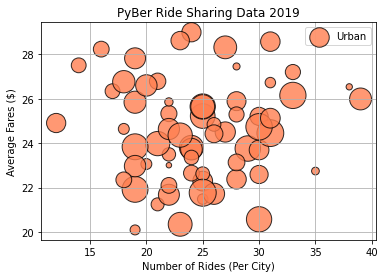

In [21]:
# Build the scatter plots for urban cities.
plt.scatter(urban_ride_count, 
            urban_avg_fare,
            s = 10*urban_drivers,
            c="coral", edgecolor="black", linewidth=1, alpha=0.8,
            label="Urban")
plt.title("PyBer Ride Sharing Data 2019"),
plt.ylabel("Average Fares ($)"),
plt.xlabel("Number of Rides (Per City)"),
plt.grid(True)
plt.legend()

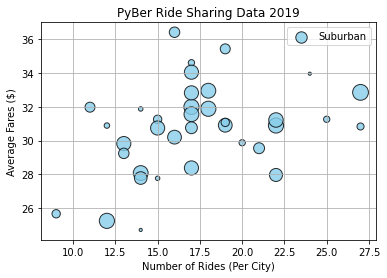

In [22]:
# Build the scatter plots for suburban cities.
plt.scatter(suburban_ride_count, 
            suburban_avg_fare,
            s = 10*suburban_drivers,
            c="skyblue", edgecolor="black", linewidth=1, alpha=0.8,
            label="Suburban")
plt.title("PyBer Ride Sharing Data 2019"),
plt.ylabel("Average Fares ($)"),
plt.xlabel("Number of Rides (Per City)"),
plt.grid(True)
plt.legend()

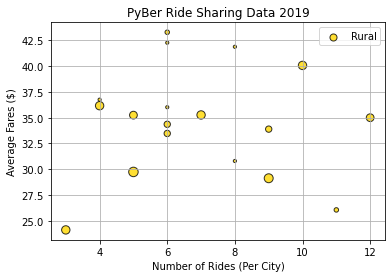

In [23]:
# Build the scatter plots for rural cities.
plt.scatter(rural_ride_count, 
            rural_avg_fare,
            s = 10*rural_drivers,
            c="gold", edgecolor="black", linewidth=1, alpha=0.8,
            label="Rural")
plt.title("PyBer Ride Sharing Data 2019"),
plt.ylabel("Average Fares ($)"),
plt.xlabel("Number of Rides (Per City)"),
plt.grid(True)
plt.legend()

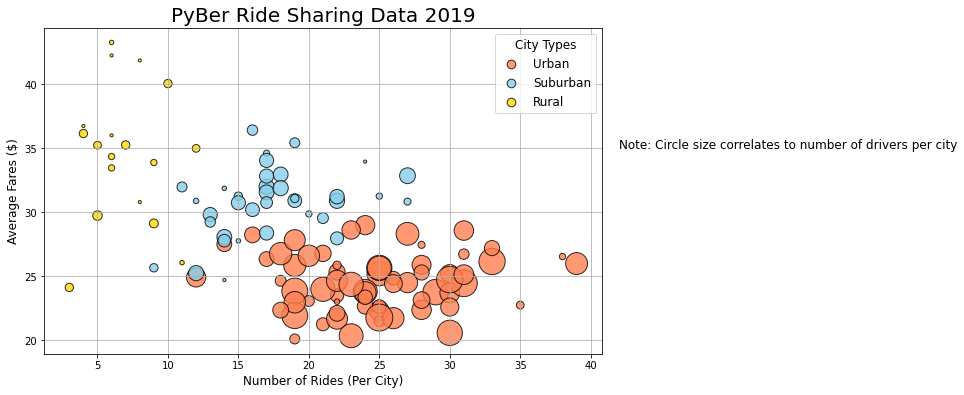

In [32]:
# Add the scatter charts for each type of city.
plt.subplots(figsize=(10, 6))
plt.scatter(urban_ride_count,
      urban_avg_fare,
      s=10*urban_drivers, c="coral",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Urban")

plt.scatter(suburban_ride_count,
      suburban_avg_fare,
      s=10*suburban_drivers, c="skyblue",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Suburban")

plt.scatter(rural_ride_count,
      rural_avg_fare,
      s=10*rural_drivers, c="gold",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Rural")
# Make it pretty
plt.title("PyBer Ride Sharing Data 2019", fontsize=20),
plt.ylabel("Average Fares ($)", fontsize=12),
plt.xlabel("Number of Rides (Per City)", fontsize=12),
plt.grid(True)

# Create a legend
lgnd = plt.legend(fontsize="12", mode="Expanded",
         scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

# Incorporate a text label about circle size.
plt.text(42, 35, "Note: Circle size correlates to number of drivers per city", fontsize="12")
# Save the figure.
plt.savefig("analysis/Fig1.png")
# Show the plot
plt.show()